In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from numpy.linalg import eig

### Import Data

In [2]:
sport_data = pd.read_csv('Data/sportset.csv',sep=';',usecols=['height','weight','sport'])

The data contains a small sample of basketball (b) and football (f) players, with their height and weight.

In [3]:
sport_data.sample(5)

,height,weight,sport
2,190,92,football
52,185,79,football
114,207,101,basket
98,197,90,basket
30,176,77,football


In [4]:
sport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   height  145 non-null    int64 
 1   weight  145 non-null    int64 
 2   sport   145 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


# Scatterplot of height and weight by sport

The data contains 2 groups, basketball and football players heights and weights, let's plot height vs weight in both
groups

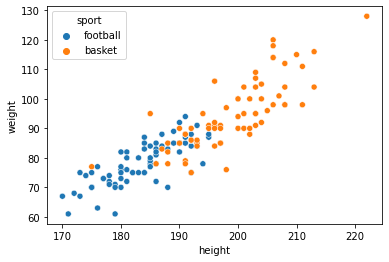

In [5]:
ax = sns.scatterplot(data=sport_data, x="height", y="weight",hue="sport")

Let's fit a regression line to the data

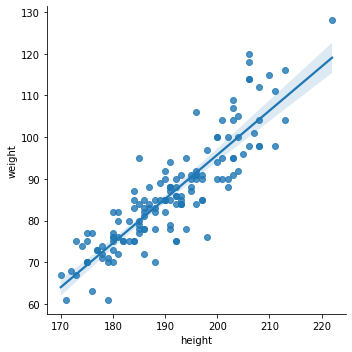

In [6]:
ax = sns.lmplot(x="height", y="weight", data=sport_data);

We will show that a PCA implemented on the sport data, compressing the 2 available features to a single one, is comparable to fitting a regression line

# Manually compute PCA to compress the 2 features (height and weight) to a single dimension

Here, we will not consider the two groups, and only look at the interaction between height and weight

## Calculate mean of our variables

In [7]:
height_mean = sport_data['height'].mean()
print('mean height: ' + str(height_mean))
weight_mean = sport_data['weight'].mean()
print('mean weight: ' + str(weight_mean))

mean height: 191.04137931034484
mean weight: 86.28965517241379


## Scale values by substracting the mean

In [8]:
sport_data_copy = sport_data.copy()
sport_data_copy['height'] = sport_data_copy['height'] - height_mean
sport_data_copy['weight'] = sport_data_copy['weight'] - weight_mean

In [9]:
sport_data_copy.head()

,height,weight,sport
0,-0.041379,7.710345,football
1,-4.041379,-2.289655,football
2,-1.041379,5.710345,football
3,-11.041379,-16.289655,football
4,-2.041379,2.710345,football


## Calculate covariance matrix 

In [10]:
cov_matrix = sport_data_copy.cov()

In [11]:
cov_matrix

,height,weight
height,112.262165,118.793487
weight,118.793487,161.332184


In [13]:
cov_matrix = cov_matrix.to_numpy()

## Calculate eigenvalues and eigenvectors

In [29]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_matrix)

In [30]:
print(eigen_values)

[ 15.49647709 258.09787157]


In [31]:
print(eigen_vectors)

[[-0.77532768  0.63155917]
 [ 0.63155917  0.77532768]]


## Sort eigenvalues in desc order

In [32]:
#sort the eigenvalues in descending order
sort_index = np.argsort(eigen_values)[::-1]
 
sorted_eval = eigen_values[sort_index]
#similarly sort the eigenvectors 
sorted_evec = eigen_vectors[:,sort_index]

In [50]:
print(sorted_eval)

[258.09787157  15.49647709]


In [49]:
print(sorted_evec)

[[ 0.63155917 -0.77532768]
 [ 0.77532768  0.63155917]]


In [54]:
print("Variance explained by first component: " + str(round(258.09/(258.09+15.496),3)))

Variance explained by first component: 0.943


## select the first component

In [55]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data.
 
n_components = 1
eigenvector_comp = sorted_evec[:,0:n_components]

In [56]:
eigenvector_comp

array([[0.63155917],
       [0.77532768]])

In [57]:
X_reduced = np.dot(eigenvector_comp.transpose(), sport_data_copy[['height','weight']].to_numpy().transpose()).transpose()

In [61]:
X_reduced

array([[  5.95191028],
       [ -4.32760321],
       [  3.76969575],
       [-19.60310494],
       [  0.81215354],
       [-19.45933643],
       [-17.2771219 ],
       [ -3.89629768],
       [-14.95113886],
       [-14.31957968],
       [-14.46334819],
       [ -1.22629249],
       [ -1.65759801],
       [ -5.44695304],
       [ -1.65759801],
       [ -4.1838347 ],
       [-19.17179941],
       [-20.14738074],
       [-26.20623368],
       [ -3.98358105],
       [ -0.53824817],
       [-14.46334819],
       [ -9.6676136 ],
       [-18.8842624 ],
       [-13.20022984],
       [-20.29114925],
       [-13.83178902],
       [  3.05085322],
       [ -1.02603884],
       [ -5.59072155],
       [-16.70204787],
       [-14.95113886],
       [ -9.61112846],
       [-14.26309454],
       [-20.23466411],
       [ -0.53824817],
       [-10.29917278],
       [-22.7609008 ],
       [-19.17179941],
       [ -9.95515062],
       [ -6.9976084 ],
       [-10.24268763],
       [  4.88904559],
       [  3

In [74]:
sport_data_copy.head()

,height,weight,sport
0,-0.041379,7.710345,football
1,-4.041379,-2.289655,football
2,-1.041379,5.710345,football
3,-11.041379,-16.289655,football
4,-2.041379,2.710345,football
